## **Install dependencies**

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [816 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelea

In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [3]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading 

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1218k      0  0:00:01  0:00:01 --:--:-- 4355k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

## **Example**

In [4]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import pandas as pd

In [5]:


# -*- coding: utf-8 -*-



def clean_text(text):
    """
    한글, 영문, 숫자만 남기고 제거한다.
    :param text:
    :return:
    
    """
    text = text.replace(".", " ").strip()
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text


def get_nouns(tokenizer, sentence):
    """
    단어의 길이가 2이상인 일반명사(NNG), 고유명사(NNP), 외국어(SL)만을 반환한다.
    :param tokenizer:
    :param sentence:
    :return:
    """
    tagged = tokenizer.pos(sentence)
    nouns = [s for s, t in tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]
    return nouns


def tokenize(df):
    tokenizer = Mecab()
    processed_data = []
    
    for sent in tqdm(df[9]):
        sentence = clean_text(sent.replace('\n', '').strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

if __name__ == '__main__':
    
    data = pd.read_excel('data.xlsx')
    processed_data = tokenize(data)   # description 부분을 토크나이징 한다.
    print(processed_data)
    # 토큰 분리한 데이터를 저장
    # save_processed_data(processed_data)

100%|██████████| 1200/1200 [00:05<00:00, 214.54it/s]

[['교환', '학생', '경험', '혼자', '비행기', '부모', '생활', '혼자', '여행', '처음', '친구', '여행', '로드', '트립', '수상', '스포츠', '브리즈', '동안', '처음', '호주', '걱정', '적응', 'UQ', '나라', '친구', '친구', '이야기', '시야', '계기', '자신', '인간', '성장', '계기', '학업', 'UQ', '고려대', '학교', '학교', '시스템', '경험', '호주', '대학교', '수업', '진행', '친구', '공부', '실험', '수업', '진행', '체험', '발전', '환경', '평소', '도전', '계기', '해외', '대학교', '미래', '진로', '생각', '계기', '경험', '교환', '학생', '학생', '경험', 'UQ', '선택', '후회', '경험', '도전', '학기', '후배', '경험', '작성', '감사'], ['도착', '혼자', '우울', '파리', '날씨', '영향', '기간', '교환', '학생', '기간', '동안', '기억', '생각', '교환', '학생', '단계', '신중', '말씀', '결정', '생각', '걱정', '메일', '부탁', '감사', '후배', '경험', '작성', '감사'], ['학년', '학기', '교환', '학생', '두려움', '졸업', '교환', '지원', '생각', '후회', '선택', '생각', '지금', '한국', '외국', '경험', '이야기', '스스로', '일상', '도착', '발견', '장점', '단점', '스스로', '인생', '자산', '생각', '경험', '확신', '생각', '경험', '고민', '약소', '교환', '학생', '도움', '블로그', '필요', '정보', '블로그', '방문', '확인', '확인', '답장', '건강', '교환', '생활', '감사', 'httpsblog', 'naver', 'comgoomong', '후배', '경험', '작성', '감사'], ['개강', 

In [13]:
from gensim.models.ldamodel import LdaModel, CoherenceModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import warnings
import time

In [8]:
dictionary = corpora.Dictionary(processed_data)

In [11]:
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in processed_data]

In [14]:
coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(7):
    
    ntopics, nwords = 200, 100
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p)
    print('epoch',p,time.time() - tic)
 
    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 15.253922939300537
Cpherence -1.7947518242086091
Perplexity:  -9.405313299473997 


epoch 5 37.42580556869507
Cpherence -1.8144642370631243
Perplexity:  -8.360552049137041 


epoch 10 70.2501471042633
Cpherence -1.8846602685609144
Perplexity:  -7.913768511405561 


epoch 15 96.72399425506592
Cpherence -1.9798608342997295
Perplexity:  -7.827160663311581 


epoch 20 119.61781740188599
Cpherence -1.965091637901871
Perplexity:  -7.791058936950742 


epoch 25 154.4048569202423
Cpherence -1.9838780129708546
Perplexity:  -7.733357720657665 


epoch 30 173.83204531669617
Cpherence -1.9126784145610487
Perplexity:  -7.7517687901690335 




KeyboardInterrupt: ignored

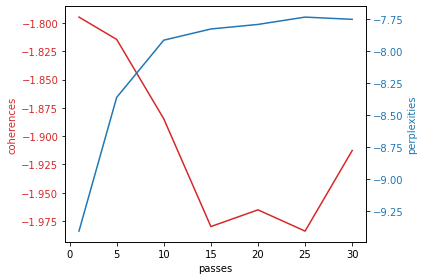

In [34]:

import matplotlib.pyplot as plt
passes = [1,5,10,15,20,25,30]


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('passes')
ax1.set_ylabel('coherences', color=color)
ax1.plot(passes, coherences, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('perplexities', color=color)  
ax2.plot(passes, perplexities, color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 
plt.show()

In [25]:
coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(1,6):
    ntopics = i*4
    nwords = 100
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=8)
    print('ntopics',i*2,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 40 37.25082802772522
Coherence -0.9195480965760097
Perplexity:  -7.158971883594865 


ntopics 40 35.34040904045105
Coherence -1.0952838522298376
Perplexity:  -7.170489585468143 


ntopics 40 28.71798062324524
Coherence -1.1780128358784732
Perplexity:  -7.139523755300642 


ntopics 40 31.992337703704834
Coherence -1.2954376208348533
Perplexity:  -7.159404539777785 


ntopics 40 37.31810665130615
Coherence -1.6342172180480463
Perplexity:  -7.184718055939784 




In [37]:
print(coherencesT)
print(perplexitiesT)

[-0.9195480965760097, -1.0952838522298376, -1.1780128358784732, -1.2954376208348533, -1.6342172180480463]
[-7.158971885796352, -7.170491598995482, -7.139521360299167, -7.159409057964533, -7.1847111212399435]


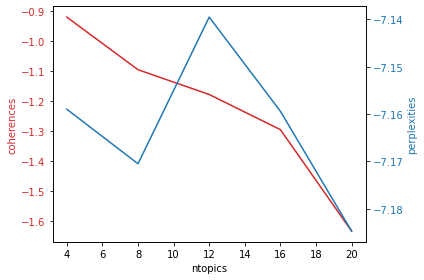

In [38]:

import matplotlib.pyplot as plt
ntopics = [i*4 for i in range(1,6)]


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('ntopics')
ax1.set_ylabel('coherences', color=color)
ax1.plot(ntopics, coherencesT, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('perplexities', color=color)  
ax2.plot(ntopics, perplexitiesT, color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 
plt.show()

In [ ]:
num_topics = 8
chunksize = 2000
passes = 8
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -0.9619.
[([(0.018954126, '신청'),
   (0.015715482, '수업'),
   (0.011720565, '학기'),
   (0.011132765, '기숙사'),
   (0.010909018, '대학교'),
   (0.010184308, '작성'),
   (0.0094294315, '경험'),
   (0.008820959, '수강'),
   (0.008251316, '정도'),
   (0.006782149, '추천'),
   (0.006726824, '과목'),
   (0.0066315443, '비자'),
   (0.00653846, '필요'),
   (0.006481477, '파견'),
   (0.0064120507, '생각'),
   (0.0063896636, '메일'),
   (0.006071745, '보고서'),
   (0.00605889, '시간'),
   (0.006014705, '고려'),
   (0.0057709836, '한국')],
  -0.8387495876411404),
 ([(0.01728453, '수업'),
   (0.013300376, '신청'),
   (0.012120002, '보험'),
   (0.010733193, '런던'),
   (0.009937937, '추천'),
   (0.008645926, '수강'),
   (0.008464118, '작성'),
   (0.007652963, '메일'),
   (0.0076060174, '경험'),
   (0.006980849, '비자'),
   (0.0066890623, '생각'),
   (0.0065894183, '대학교'),
   (0.0060245306, '절차'),
   (0.0058682207, '필요'),
   (0.0058600213, '파견'),
   (0.005810532, '과목'),
   (0.0057789707, '친구'),
   (0.0057112114, '정도'),
   (0.005699679

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 30.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d36de5cb35c5528458ec25e4d47eded1e5879631d6442d99ebddf75792881ea8
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'file_name.html')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
